## Labo Week 6 

### **Deel 1** Cross-validatie - Grid-Search - ROC curves
In dit labo zullen we de modellen die we vorige week bestudeerden op enerzijds de housing data en anderzijds de examenresultaten data evalueren.

**Oefening 1** : **Housing data : Gridsearch in combinatie met cross-validatie**
    
Gegeven de dataset housing.csv. Deze dataset kan worden gebruikt om te voorspellen of een appartement in New York gelegen is of in San Fransisco. 

**1.1** Gebruik je treemodel van voordien maar nu in combinatie met **Cross-validatie** om de performantie van je model beter in te schatten.
Gebruik volgende import: 
```
from sklearn.model_selection import cross_val_score of
from sklearn.model_selection import cross_validate
```


**1.2** Herhaal deze oefening maar nu in combinatie met **Leave-one out Cross-validation**. Gebruik nu :
```
from sklearn.model_selection import LeaveOneOut
```


**1.3** Gebruik naast training en testset nu ook een **validatieset**. Gebruik GridSearch en CV in combinatie via **GridSearchCV** om zowel de ideale diepte van de boom als de randomstate te onderzoeken. $\newline$
Maak hierbij gebruik van $5$ folds en beide imports :
```
from sklearn.model_selection import GridSearchCV ## training & validatie
from sklearn.model_selection import train_test_split ## 1 test set maken
```


**1.4** Gebruik opnieuw **GridSearchCV** maar nu ook in combinatie met **Cross-validation op de testset** :
```
from sklearn.model_selection import GridSearchCV ## training & validatie
from sklearn.model_selection import cross_val_score ## training vs testen
```


Vergelijk je bekomen resultaten telkens met de vorige behaalde resultaten. Vergelijk niet alleen op basis van gemiddelde train en test scores maar ook op basis van tijd. Gebruik hiertoe de resultaten uit de functie **cross\_validate** uit $sklearn.model\_selection$ of gewoon een timer functie uit : 
```
from time import perf_counter as time
```

**1.1 Standaard Cross-validation : cross\_val\_score en cross\_validate**

**1.2 Leave-one out**

**1.3 GridSearchCV**

**1.4 GridSearchCV in combinatie met CV voor de testset**

**Oefening 2** : **Alternatieve metrieken om modellen te vergelijken**

Gebruik voor deze oefening de cijfers.txt datafile uit labo 6. Stel 2 verschillende classificatiemethoden op : (lineaire model en decision trees) en gebruik onderstaande metrieken om de 2 modellen te vergelijken. 

**2.1** Gebruik 25% van de data om te testen en bereken van beide alvast de klassieke accuracy.

**2.2** Bereken daarna de confusion matrix van beide modellen, gebruik hierbij :
```
from sklearn.metrics import confusion_matrix
```

**2.3** Bepaal nu de precision, recall en F1 score via :
```
from sklearn.metrics import classification_report
```

**2.4** Teken ten slotte de ROC curve. Hiervoor moet je de false positive rate uitzetten t.o.v de true positive rate. Je zal eerst voor elk element in de test set de kans om terecht te komen in de true state (toeglaten) moeten berekenen, dit kan via de methode : 
```
modellogistRegr.predict_proba(x_Examtest)[:,1]
```
Via de 
```
from sklearn.metrics import roc_curve
```
kan je nu de false positive en true positive rate berekenen en kan je deze plotten t.o.v. elkaar

_Tip:_ [Goeie blog rond de verschillende technieken](https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a)


### **Deel 2** Het effect van schalen van data

Het schalen van features kan een grote impact hebben op het eindresultaat van sommige algoritmen, terwijl bij andere er amper een effect te zien is. Wanneer de dataset features bevat die heel erg variëren in grootte, eenheden en ranges en je een algoritme wil gebruiken dat afhankelijk is van de Euclidische afstandsmaat is het een goed idee om je data eerst de schalen.

**Oefening 3** 
Hergebruik in deze oefening de _auto\_extra.txt_ datafile met het _mpg_ regressie probleem. 

 **3.1**  Maak een boxplot van de featuredata om te zien hoe deze varieert in grootte en schaal t.o.v. elkaar. Info over maken van boxplots : https://matplotlib.org/3.2.1/gallery/pyplots/boxplot_demo_pyplot.html
 Teken deze boxplots opnieuw na schaling van de data door de varianten MinMaxScaler, standardScaler, RobustScaler
 
 **3.2** Test enkele algoritmen die je kent (Lineaire regressie, Lasso, Ridge, KNN, DecisionTree, RandomForest, ...) en ga na welke hiervan baat hebben bij schaling op deze data (probeer de varianten MinMaxScaler, StandardScaler, RobustScaler).
 Geef je resultaten weer in een pandas dataframe. Je mag van elk algoritme de default parametersettings gebruiken, op die manier kan je het opstellen en fitten van al deze modellen op een algemene manier via een functie doen, waarbij je een lijst van scalers en een lijst van modellen meegeeft als argument.
 Bvb :
  ```
 def runScalers(models, scalers)
 ```

#### 3.1 Boxplots

#### 3.2 Algoritmen

### **Deel 3** Unsupervised learning

**Oefening 4** Clustering

Gegeven volgende artificiële data :

          X         Y color
0 -0.762340 -1.322876   red
1 -1.152338  0.603637   red
2 -1.055054 -1.334224   red
3  1.246703  1.066556   red
4 -0.450195 -1.912533   red


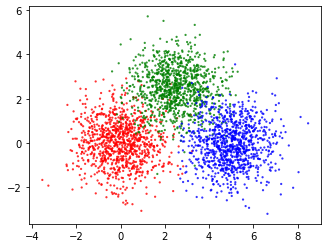

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

N = 1000 
test = pd.DataFrame(np.random.normal(size=(3*N,2)))
test.loc[0:N,2] = 'red'
test.loc[N:2*N,2] = 'green'
test.loc[2*N:3*N,2] = 'blue'
test.columns=['X', 'Y', 'color']
test.iloc[N:2*N,0:2] += 2.5
test.iloc[2*N:3*N,0] += 5

print(test.head())

plt.scatter(test.iloc[:,0], test.iloc[:,1], alpha=0.8, c=test.iloc[:,2], edgecolors='none', s=5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

   __4.1__ Gebruik k-means(++)  om de gecreërde clusters terug te vinden. Visualiseer de cluster opnieuw en vergelijk met de oorspronkelijke plot. Varieer met de waarde k. 
   
   __4.2__ Probeer de ideale k-waarde te vinden via enerzijds :
       * de Elbow methode om de optimale waarde voor k te bepalen. Hiertoe gebruik je een score functie. Vergelijk tussen twee score functies:
        - inertia of de SSE score :  deze berekent de som van de kwadraten van de afstand van elk punt tot zijn cluster center en kan je gewoon opvragen aan je Kmeans model 
        - Distortion score : Deze berekent de gemiddelde afstand van een punt tot zijn clustercentrum. Gebruik de functie cdist om de  de Euclidische afstand te berekenen.   
    ```
    from scipy.spatial.distance import cdist
    ```
     
      * Ga ook na hoe je de silhouette score kan gebruiken om een keuze van k te maken.  Bereken de Silhouette score van je modellen via : 
 ```
 from sklearn.metrics import silhouette_score
 ```
 
 
  __4.3__ Wat geeft DBSCAN op deze convexe data? Plot je resultaat naast de oorspronkelijke data.
    Bereken ook de silhouette score voor DBSCAN.
 

In [ ]:
#4.1 k-means clustering

In [79]:
#4.2 Elbow methode

In [ ]:
#4.3 DBSCAN